# 결정 트리 (와인 종류 예측하기)

> 와인의 도수, 당도, pH 값을 이용해서 레드 와인과 화이트 와인을 분류하기

* 와인의 특성값들을 이용해서 와인의 종류를 예측하는 분류 문제이다.
* 사용한 모델 : 결정 트리

이번 장에서는 비교적 설명하기 쉬우면서도 성능이 좋은 결정 트리에 대해서 알아본다.

## 데이터 준비

In [39]:
import pandas as pd
wine = pd.read_csv("https://bit.ly/wine_csv_data")

In [40]:
# 와인 데이터셋을 판다스 데이터프레임으로 제대로 읽어 들었는지 확인
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [41]:
# info() 메서드: 데이터프레임의 각 열의 데이터 타입과 누락된 데이터 여부를 확인
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [42]:
# describe() 메서드: 데이터프레임의 열에 대한 간략한 통계를 출력
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [43]:
data = wine[["alcohol", "sugar", "pH"]].to_numpy()
target = wine["class"].to_numpy()

print(data.shape, target.shape)

(6497, 3) (6497,)


In [44]:
from sklearn.model_selection import train_test_split

# 데이터의 20%를 테스트 세트로 분할
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

In [45]:
from sklearn.preprocessing import StandardScaler

# 특성을 표준점수로 표준화 전처리
ss = StandardScaler()
ss.fit(train_input)
train_input_scaled = ss.transform(train_input)
test_input_scaled = ss.transform(test_input)

## 모델 생성 및 검증

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input_scaled, train_target)

print(dt.score(train_input_scaled, train_target))
print(dt.score(test_input_scaled, test_target))

0.996921300750433
0.8592307692307692


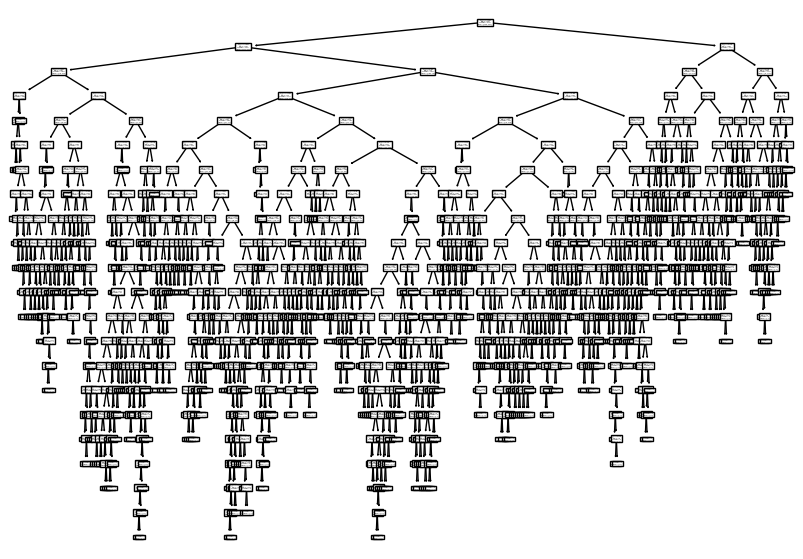

In [47]:
# 결정 트리 모델을 그림으로 출력
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

### 불순도 (impurity)

> 결정 트리는 정보 이득이 최대가 되도록 노드를 분할해서 트리를 성장시킨다.

정보 이득은 부모 노드와 자식 노드의 불순도 차이이다.

불순도는 criterion 매개변수를 통해서 지정할 수 있는데 기본으로 지니 불순도를 나타내는 'gini'이다.

지니 불순도는 노드에서 각 클래스의 비율의 제곱한 것들의 합을 1에서 뺀 값이다.

지니 불순도는 해당 노드에 샘플이 절반씩 나눠지면 0.5로 최악이며, 하나의 샘플로 모두 구성되어 있으면 0이다.

결정 트리는 부모 노드의 불순도에서 자식 노드의 불순도의 가중합을 뺀 정보 이득이 최대가 되는 속성을 이용해서 노드를 분할한다.

결정트리 객체를 생성할 때 criterion 매개변수에 'entropy' 인자를 넘겨주면 엔트로피 불순도를 사용해서 노드를 분할하게 된다.

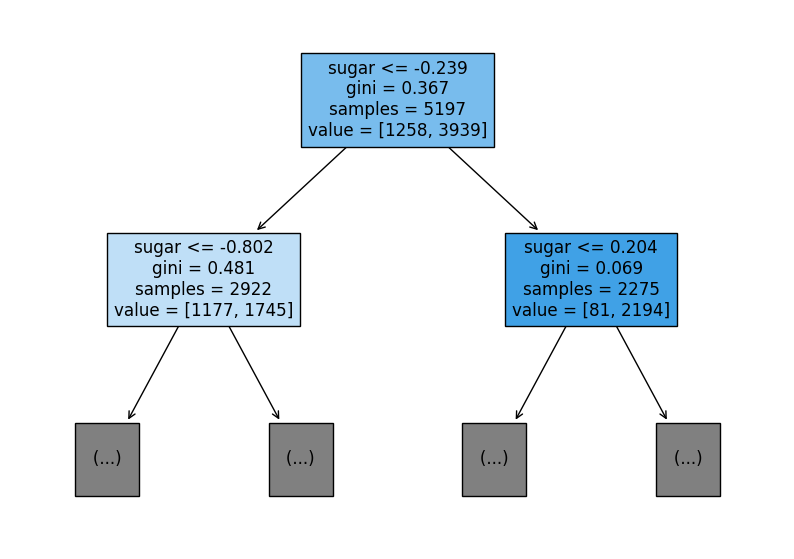

In [48]:
# 트리의 깊이를 제한해서 출력
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=["alcohol", "sugar", "pH"])
plt.show()

# 위에서 부터 테스트의 조건, 불순도, 총 샘플 개수, 클래스별 샘플 개수

# 테스트의 조건에 대해 왼쪽 가지가 yes, 오른쪽 가지가 no
# value의 왼쪽이 음성 클래스 (레드 와인, 0), 오른쪽이 양성 클래스 (화이트 와인, 1)

# 리프 노드에서 가장 많은 클래스가 예측 클래스가 된다.

# 정보 이득이 최대가 되도록 데이터를 나눈다. (기준: 지니 불순도)

### 가지치기 (pruning)

> 결정 트리는 가지치기를 통해서 훈련 세트에 과대적합되는 문제를 해결한다.
> 대표적인 가지치기는 결정 트리의 최대 깊이를 제한하는 것이다.

In [49]:
# 결정 트리의 가지치기
# 최대 깊이를 3으로 제한
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input_scaled, train_target)

print(dt.score(train_input_scaled, train_target))
print(dt.score(test_input_scaled, test_target))

0.8454877814123533
0.8415384615384616


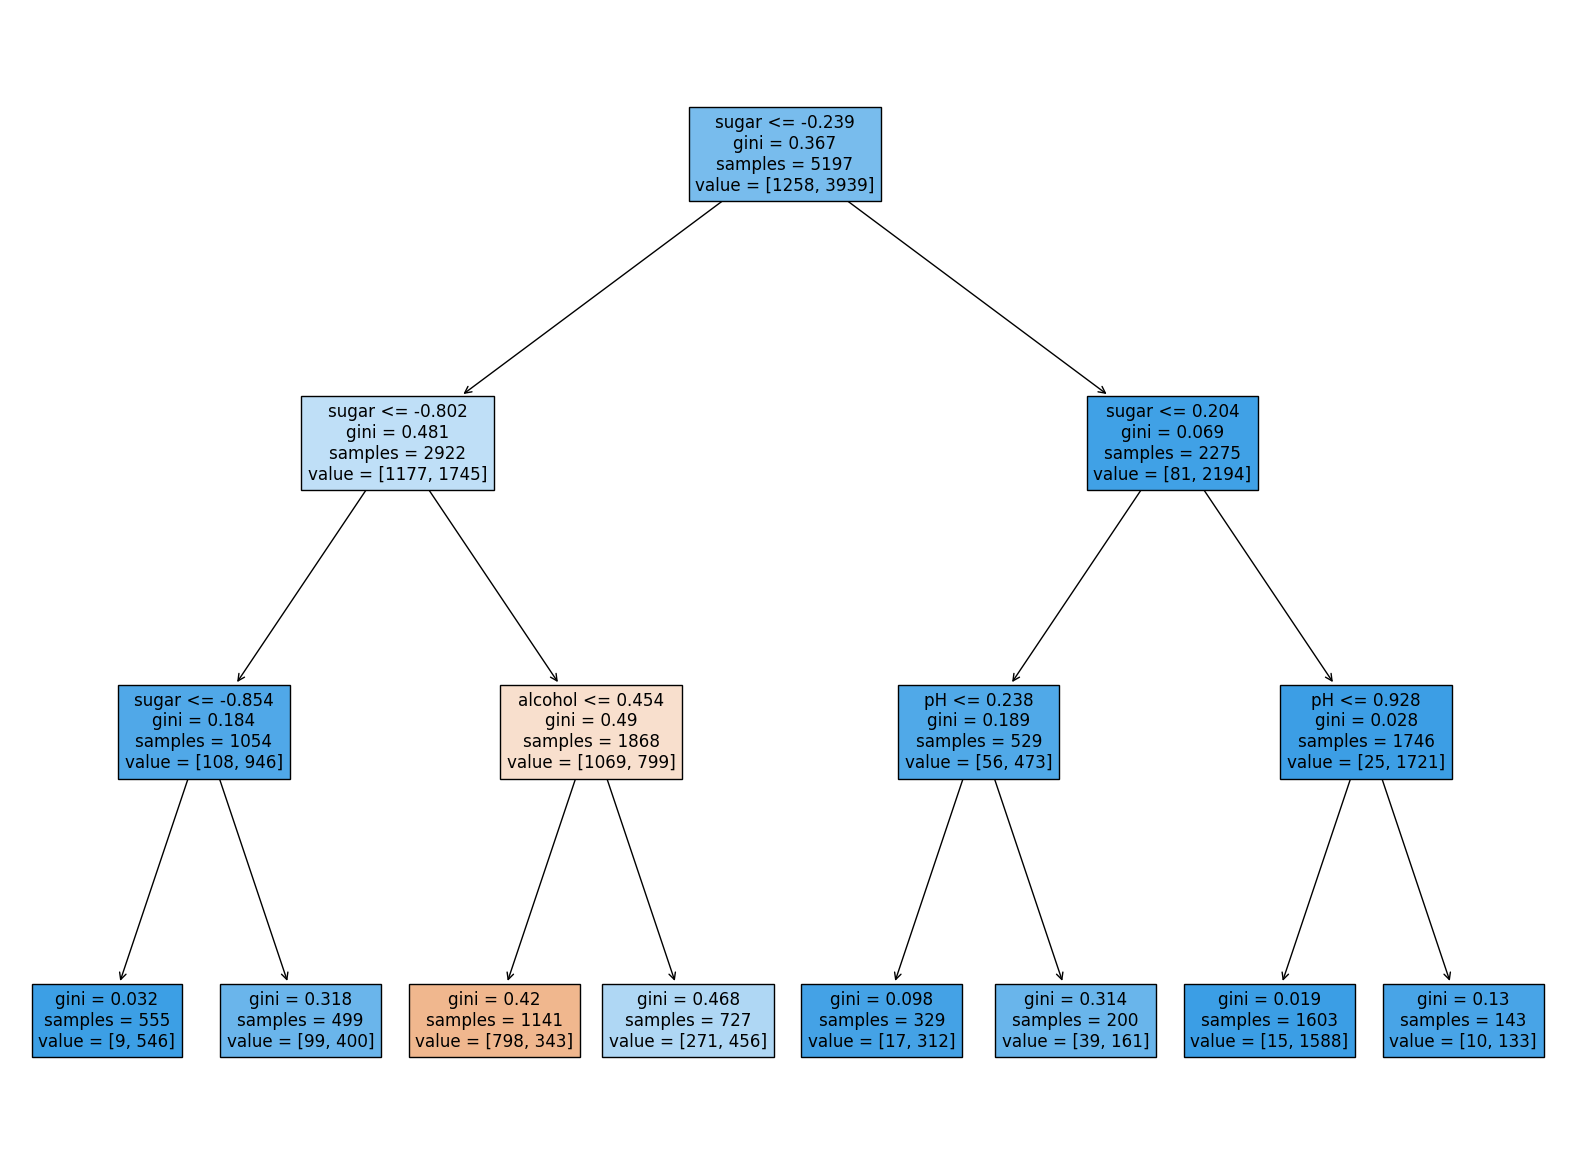

In [50]:
# 최대 깊이가 3인 결정 트리를 그림으로 표현
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=["alcohol", "sugar", "pH"])
plt.show()

In [51]:
# 지니 불순도는 클래스별 비율을 이용해서 구하고 이는 특성값의 스케일과는 무관하다.
# 따라서 표준화 전처리를 할 필요가 없다.
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


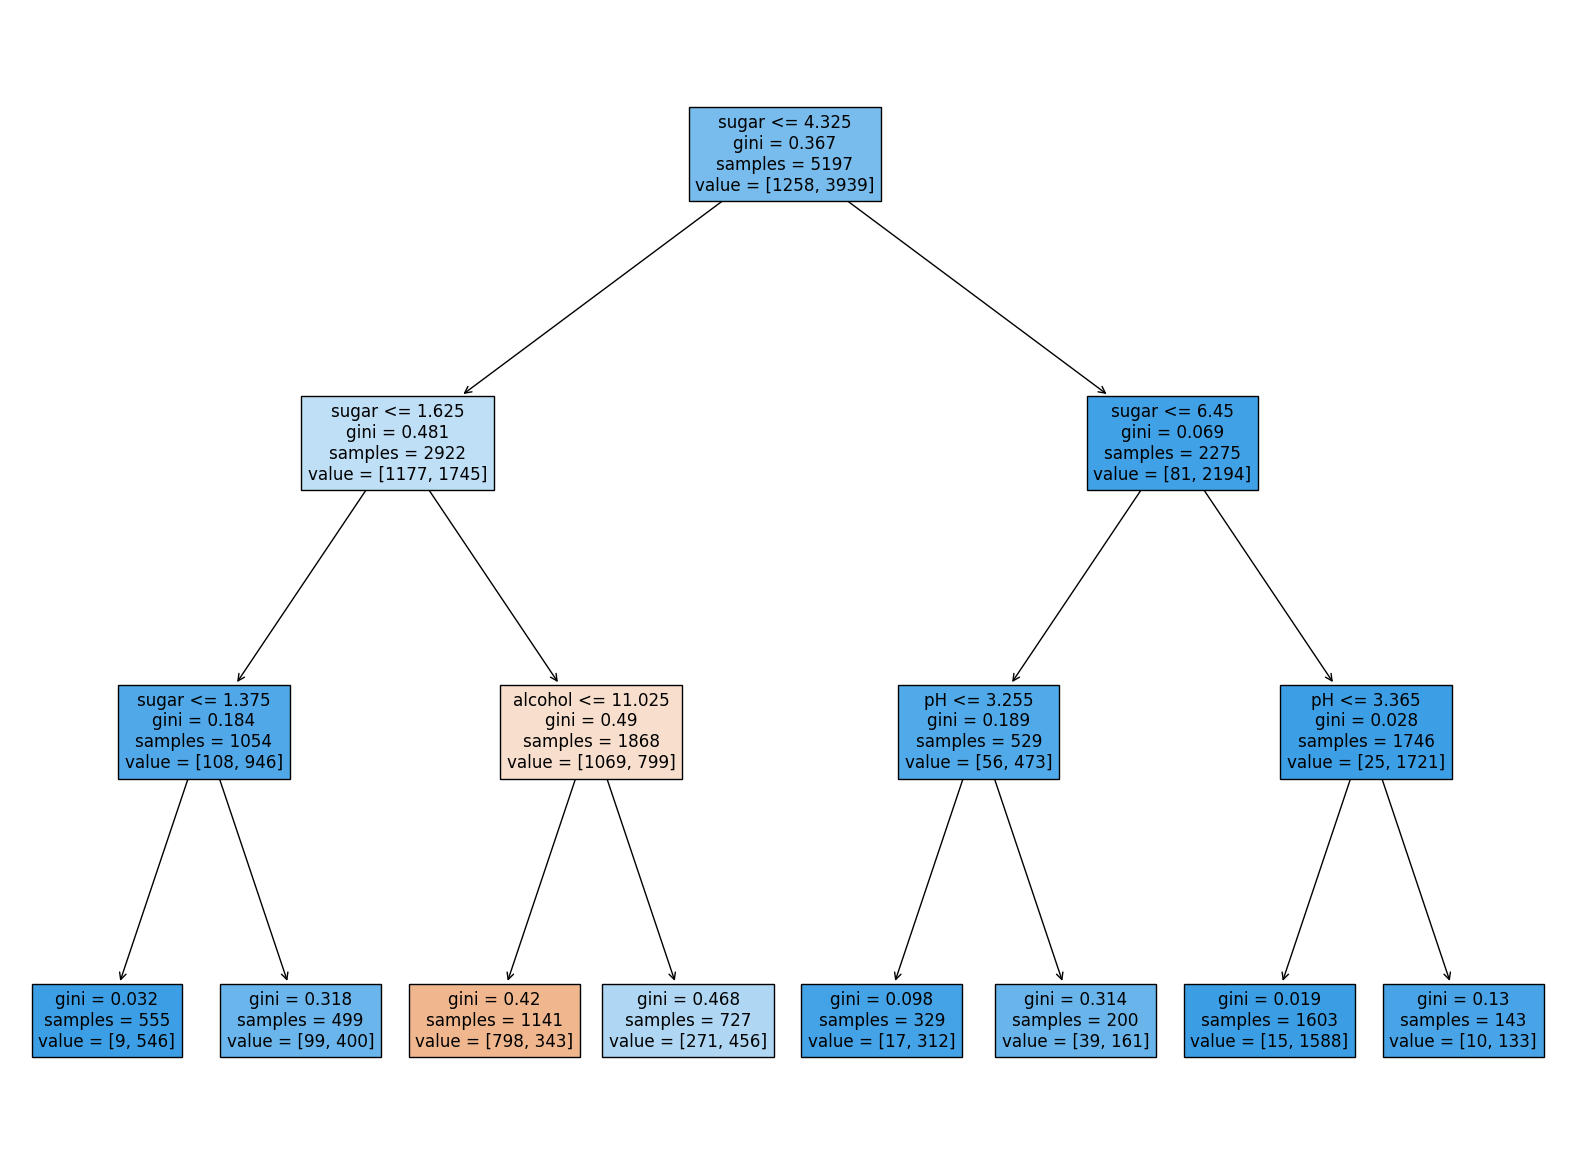

In [52]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=["alcohol", "sugar", "pH"])
plt.show()

In [53]:
# 결정 트리는 어떤 특성이 가장 유용한지를 나타내는 특성 중요도를 계산해 준다.
# 결정 트리를 특성 선택에 활용할 수 있다.
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
